<a href="https://colab.research.google.com/github/daquarti/AI/blob/main/Training_Named_Entity_Recognition_CRF_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
path = "/content/gdrive/My Drive/NLP/antecedentes/"

In [ ]:
import pickle
pickle_in = open(path + 'tuplas_antecedentes_18_junio.pkl',"rb")
antecedentes = pickle.load(pickle_in)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [ ]:
len (antecedentes)

253577

In [ ]:
antecedentes[220]

[('control', 'O'),
 ('de', 'O'),
 ('lipidos', 'O'),
 ('57', 'O'),
 ('años', 'O'),
 ('antec', 'O'),
 ('de', 'O'),
 ('dislipemia', 'B-antecedentes'),
 ('toma', 'O'),
 ('t4', 'O'),
 ('50', 'O'),
 ('ug', 'O'),
 ('y', 'O'),
 ('otra', 'O'),
 ('medicacion', 'O'),
 ('para', 'O'),
 ('lipidos', 'O'),
 ('para', 'O'),
 ('colsterol', 'O'),
 ('trae', 'O'),
 ('lab', 'O'),
 ('de', 'O'),
 ('09', 'O'),
 ('08', 'O'),
 ('completo', 'O'),
 ('con', 'O'),
 ('hepatograma', 'O'),
 ('con', 'O'),
 ('serologais', 'O'),
 ('para', 'O'),
 ('hepatitis', 'B-antecedentes'),
 ('a', 'O'),
 ('b', 'O'),
 ('c', 'O'),
 ('y', 'O'),
 ('hiv', 'B-antecedentes'),
 ('no', 'O'),
 ('reactivos', 'O'),
 ('eco', 'O'),
 ('abdominal', 'O'),
 ('normal', 'O')]

In [ ]:
word_list = []
for s in antecedentes:
  for w in s:
    word_list.append(w[0])

In [ ]:
tag_list = []
for s in antecedentes:
  for w in s:
    tag_list.append(w[1])

In [ ]:
words = set(word_list)
words.add('PADword')
n_words = len(words); n_words

99170

In [ ]:
tags = list(set(tag_list))
n_tags = len(tags); n_tags

3

In [ ]:
tags

['O', 'I-antecedentes', 'B-antecedentes']

In [ ]:
sentences = antecedentes

In [ ]:
print (sentences[2])

[('hta', 'B-antecedentes'), ('bajo', 'O'), ('tx', 'O'), ('mx', 'O'), ('ok', 'O'), ('registors', 'O'), ('border', 'O'), ('line', 'O'), ('indico', 'O'), ('aumento', 'O'), ('de', 'O'), ('enalapril', 'O'), ('a', 'O'), ('15', 'O'), ('mg', 'O'), ('dia', 'O'), ('atenolol', 'O'), ('50', 'O'), ('mg', 'O'), ('dia', 'O'), ('\r\r', 'O'), ('control', 'O'), ('en', 'O'), ('60', 'O'), ('dias', 'O')]


In [ ]:
largest_sen = max(len(sen) for sen in sentences)
print('biggest sentence has {} words'.format(largest_sen))

biggest sentence has 86 words


In [ ]:
len(sentences)

253577

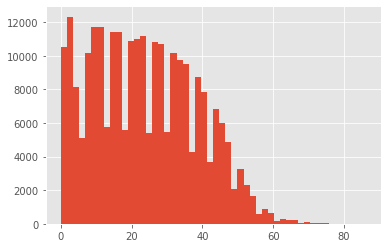

In [ ]:
%matplotlib inline
plt.hist([len(sen) for sen in sentences], bins= 50)
plt.show()

In [ ]:
from future.utils import iteritems

word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}
idx2tag = {v: k for k, v in iteritems(tag2idx)}

In [ ]:
dic_predict = {'word2idx': word2idx, 'tag2idx': tag2idx, 'idx2tag': idx2tag}

In [ ]:
import json
with open(path + 'dic_predict_crf_june_19.json', 'w') as fp:
    json.dump(dic_predict, fp, ensure_ascii=False)

In [ ]:
import json
dics = json.load(open(path + 'dic_predict_crf_june_19.json', 'r'))

In [ ]:
print(list(word2idx.keys())[list(word2idx.values()).index(99169)])

bnuena


In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

maxlen = max([len(s) for s in sentences])

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=maxlen, sequences=X, padding="post",value=n_words - 1)

y = [[tag2idx[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=maxlen, sequences=y, padding="post", value=tag2idx["O"])
y = [to_categorical(i, num_classes=n_tags) for i in y]


Using TensorFlow backend.


In [ ]:
len (X)

253577

In [ ]:
len(y)

253577

In [ ]:
y[2]

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
len(y[1])

86

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-wleog4y3
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-wleog4y3
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101064 sha256=db5452edaaa88a7a246e111eefb2acd14fd2344860241c614cfface6b5f4301f
  Stored in directory: /tmp/pip-ephem-wheel-cache-fj0yoit_/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [ ]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
import keras as k
from keras_contrib.layers import CRF

In [ ]:
input = Input(shape=(86,))
word_embedding_size = 150

# Embedding Layer
model = Embedding(input_dim=n_words, output_dim=word_embedding_size, input_length=86)(input)

# BI-LSTM Layer
model = Bidirectional(LSTM(units=word_embedding_size, 
                           return_sequences=True, 
                           dropout=0.5, 
                           recurrent_dropout=0.5, 
                           kernel_initializer=k.initializers.he_normal()))(model)
model = LSTM(units=word_embedding_size * 2, 
             return_sequences=True, 
             dropout=0.5, 
             recurrent_dropout=0.5, 
             kernel_initializer=k.initializers.he_normal())(model)

# TimeDistributed Layer
model = TimeDistributed(Dense(n_tags, activation="relu"))(model)  

# CRF Layer
crf = CRF(n_tags)

out = crf(model)  # output
model = Model(input, out)

In [ ]:
#Optimiser 
adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)

# Compile model
model.compile(optimizer=adam, loss=crf.loss_function, metrics=[crf.accuracy, 'accuracy'])

model.summary()



/usr/local/lib/python3.6/dist-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/usr/local/lib/python3.6/dist-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 86)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 86, 150)           14875500  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 86, 300)           361200    
_________________________________________________________________
lstm_2 (LSTM)                (None, 86, 300)           721200    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 86, 3)             903       
_________________________________________________________________
crf_1 (CRF)                  (None, 86, 3)             27        
Total params: 15,958,830
Trainable params: 15,958,830
Non-trainable params: 0
_______________________________________________

In [ ]:
history = model.fit(X, np.array(y), batch_size=256, epochs=3, validation_split=0.2, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 202861 samples, validate on 50716 samples
Epoch 1/3
202861/202861 [==============================] - 3607s 18ms/step - loss: 0.0402 - crf_viterbi_accuracy: 0.9904 - accuracy: 0.9865 - val_loss: 0.0018 - val_crf_viterbi_accuracy: 0.9998 - val_accuracy: 0.9998
Epoch 2/3
202861/202861 [==============================] - 3626s 18ms/step - loss: 6.5040e-04 - crf_viterbi_accuracy: 0.9999 - accuracy: 0.9865 - val_loss: -2.3375e-06 - val_crf_viterbi_accuracy: 0.9999 - val_accuracy: 0.9999
Epoch 3/3
202861/202861 [==============================] - 3568s 18ms/step - loss: -0.0012 - crf_viterbi_accuracy: 1.0000 - accuracy: 0.9865 - val_loss: -0.0019 - val_crf_viterbi_accuracy: 0.9999 - val_accuracy: 0.9999


In [ ]:
history.history

{'accuracy': [0.9865222, 0.9865219, 0.9865222],
 'crf_viterbi_accuracy': [0.9904211, 0.99991184, 0.99997467],
 'loss': [0.04017434200045465, 0.0006503974435047786, -0.0011589880912284964],
 'val_accuracy': [0.9998372197151184, 0.9999424815177917, 0.9999470114707947],
 'val_crf_viterbi_accuracy': [0.9998369812965393,
  0.9999423623085022,
  0.9999469518661499],
 'val_loss': [0.0018206756676564344,
  -2.3374910031084885e-06,
  -0.001863775902370953]}

In [ ]:
from tensorflow.keras.models import load_model

model.save(path + 'my_model_antecedentes_junio_20.h5')

In [ ]:
from keras.models import load_model
from keras_contrib.layers import CRF
from keras_contrib.losses import  crf_loss
from keras_contrib.metrics import crf_viterbi_accuracy


# To load the model
custom_objects={'CRF'                 : CRF,
              'crf_loss'            : crf_loss,
              'crf_viterbi_accuracy': crf_viterbi_accuracy}

# To load a persisted model that uses the CRF layer 
model1 = load_model(path + 'my_model_antecedentes_junio_20.h5', custom_objects = custom_objects)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


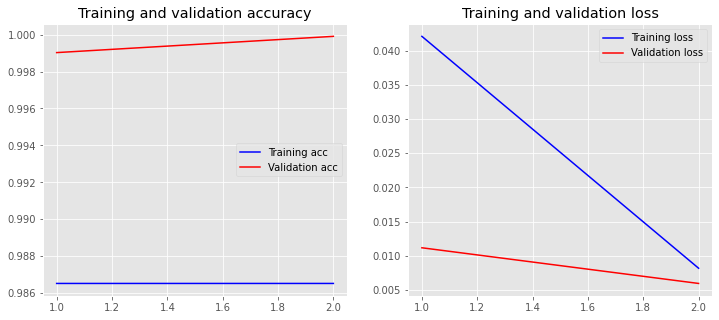

In [ ]:
plt.style.use('ggplot')

def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training acc')
    plt.plot(x, val_accuracy, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

In [ ]:
def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i])
        out.append(out_i)
    return out
test_pred = model.predict(X_test, verbose=1)   
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_test)

50716/50716 [==============================] - 298s 6ms/step


In [ ]:
! pip install seqeval

  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=83cda4f28d62b65b9b369a99014f0ac278770d95746fb965bb3345f2b458d010
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
Successfully built seqeval


In [ ]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

F1-score: 99.8%


In [ ]:
! pip install sklearn_crfsuite

     |████████████████████████████████| 747kB 3.8MB/s 


In [ ]:
from  sklearn_crfsuite.metrics import flat_classification_report  
report = flat_classification_report(y_pred=pred_labels, y_true=test_labels)
print(report)

                precision    recall  f1-score   support

B-antecedentes       1.00      1.00      1.00     56534
I-antecedentes       0.98      1.00      0.99      2728
             O       1.00      1.00      1.00   4302314

      accuracy                           1.00   4361576
     macro avg       0.99      1.00      1.00   4361576
  weighted avg       1.00      1.00      1.00   4361576



In [ ]:
TP = {}
TN = {}
FP = {}
FN = {}
for tag in tag2idx.keys():
    TP[tag] = 0
    TN[tag] = 0    
    FP[tag] = 0    
    FN[tag] = 0    

def accumulate_score_by_tag(gt, pred):
    """
    For each tag keep stats
    """
    if gt == pred:
        TP[gt] += 1
    elif gt != 'O' and pred == 'O':
        FN[gt] +=1
    elif gt == 'O' and pred != 'O':
        FP[gt] += 1
    else:
        TN[gt] += 1

In [ ]:
for i, sentence in enumerate(X_test):
    y_hat = np.argmax(test_pred[0], axis=-1)
    gt = np.argmax(y_test[0], axis=-1)
    for idx, (w,pred) in enumerate(zip(sentence,y_hat)):
        accumulate_score_by_tag(idx2tag[gt[idx]],tags[pred])

In [ ]:
for tag in tag2idx.keys():
    print(f'tag:{tag}')    
    print('\t TN:{:10}\tFP:{:10}'.format(TN[tag],FP[tag]))
    print('\t FN:{:10}\tTP:{:10}'.format(FN[tag],TP[tag]))    

tag:O
	 TN:         0	FP:         0
	 FN:         0	TP:   4361576
tag:B-antecedentes
	 TN:         0	FP:         0
	 FN:         0	TP:         0
tag:I-antecedentes
	 TN:         0	FP:         0
	 FN:         0	TP:         0


INFERENCIA

In [ ]:
def prediccion (oracion):
  from keras.preprocessing.sequence import pad_sequences
  oracion_split = oracion.split (' ')
  oracion_index = [word2idx[w] for w in oracion_split]
  oracion_final = pad_sequences(maxlen=86, sequences=[oracion_index], padding="post",value=n_words - 1)
  return oracion_final

In [ ]:
x_predict = prediccion ("tiene antecedentes de insuficiencia renal y remplazo cadera derecha")

In [ ]:
def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i])
        out.append(out_i)
    return out
test_pred = model.predict(X_test, verbose=1)   
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_test)

50716/50716 [==============================] - 304s 6ms/step


In [ ]:
test_pred = model1.predict(x_predict, verbose=1)   

1/1 [==============================] - 0s 282ms/step


In [ ]:
pred_labels = pred2label(test_pred)

In [ ]:
pred_labels

[['O',
  'O',
  'O',
  'B-antecedentes',
  'I-antecedentes',
  'O',
  'B-antecedentes',
  'I-antecedentes',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O']]